# **Marketing Analytics**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df=pd.read_csv('marketing_campaign.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09-04-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03-08-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02-10-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,06-10-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#### **Data cleaning through excel**
- Fixed all the columns by using text to column function
- Fixed Dt_Customer column which is in the mixed format of 09-04-2012 and 03/08/2014 and changed to format of dd-mm-yyyy


### **Descriptive Statistics**
#### **Columns in the dataset**

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
column_profile = df.dtypes.to_frame(name="Data Type")
column_profile["Null Values"] = df.isnull().sum()
column_profile["Unique Values"] = df.nunique()
null_perc=(df.isnull().sum()/len(df))*100

# Display the column profiling in a readable format
print(column_profile)
print('\n\nNull Value Percentage:\n ',null_perc)

                    Data Type  Null Values  Unique Values
ID                      int64            0           2240
Year_Birth              int64            0             59
Education              object            0              5
Marital_Status         object            0              8
Income                float64           24           1974
Kidhome                 int64            0              3
Teenhome                int64            0              3
Dt_Customer            object            0            663
Recency                 int64            0            100
MntWines                int64            0            776
MntFruits               int64            0            158
MntMeatProducts         int64            0            558
MntFishProducts         int64            0            182
MntSweetProducts        int64            0            177
MntGoldProds            int64            0            213
NumDealsPurchases       int64            0             15
NumWebPurchase

- Income has 24 null values which is of ~1.1%. Dropping the null values
- Change the Dt_Customer datatype to datetime format

In [5]:
df = df.dropna(subset=['Income'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

C:\Users\mohit\AppData\Local\Temp\ipykernel_22872\1059083906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

- Null values are removed and Dt_Customer column datatype was changed to Datetime format

#### **Checking duplicates** 

In [7]:
df.duplicated().sum()

0

- No duplicates in the dataset

<Axes: >

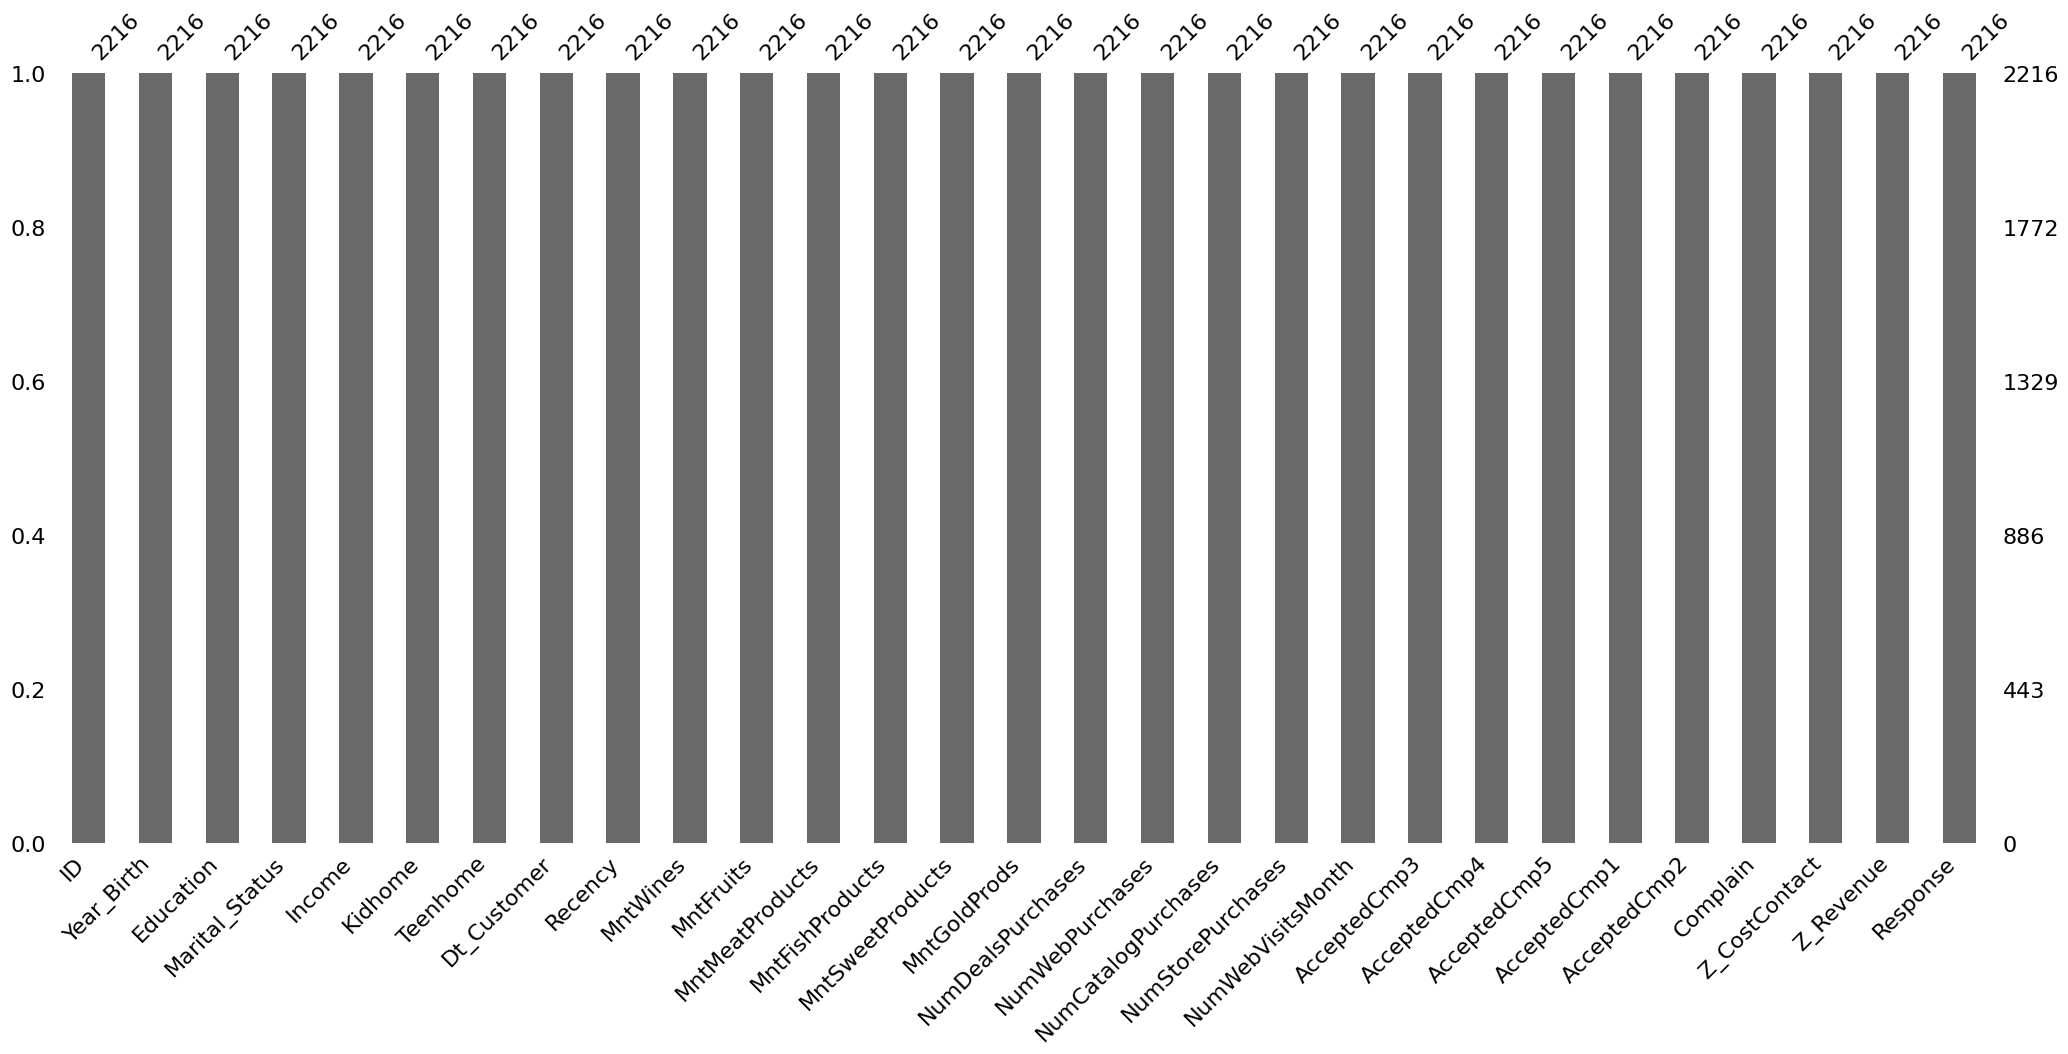

In [8]:
msno.bar(df)

In [9]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1116,857,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5588.353339,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


---
### **Feature Engineering**

In [10]:
fe_data=df.copy()

In [11]:
#Feature: Total Spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
fe_data['Total_Spending'] = fe_data[spending_columns].sum(axis=1)

#Feature: Total Purchases
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
fe_data['Total_Purchases'] = fe_data[purchase_columns].sum(axis=1)

#Children in household
fe_data['Children_in_Household'] = fe_data['Kidhome'] + fe_data['Teenhome']

#Avg spending by each customer
fe_data['Avg_Spending'] = fe_data['Total_Spending'] / fe_data['Total_Purchases']

In [12]:
last_recorded_date = fe_data['Dt_Customer'].max()
# Calculate "Days Registered" as the difference between the last recorded date and the customer's registration date
fe_data['Days_Registered'] = (last_recorded_date - fe_data['Dt_Customer']).dt.days

#Feature: Frequency of Purchases
fe_data['Frequency_of_Purchases'] = fe_data['Total_Purchases'] / fe_data['Days_Registered']

fe_data



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Total_Spending,Total_Purchases,Children_in_Household,Avg_Spending,Days_Registered,Frequency_of_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,1617,25,0,64.680000,971,0.025747
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,27,6,2,4.500000,125,0.048000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,776,21,0,36.952381,472,0.044492
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,53,8,1,6.625000,65,0.123077
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,422,19,1,22.210526,321,0.059190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,1341,18,1,74.500000,541,0.033272
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,444,22,3,20.181818,61,0.360656
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,1241,19,0,65.315789,315,0.060317
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,843,23,1,36.652174,316,0.072785


#### **Customer Segmentation using RFM Analysis**

In [13]:
#RFM-analysis
rfm_df=fe_data[['ID','Recency','Frequency_of_Purchases','Avg_Spending']].copy()
rfm_df

,ID,Recency,Frequency_of_Purchases,Avg_Spending
0,5524,58,0.025747,64.680000
1,2174,38,0.048000,4.500000
2,4141,26,0.044492,36.952381
3,6182,26,0.123077,6.625000
4,5324,94,0.059190,22.210526
...,...,...,...,...
2235,10870,46,0.033272,74.500000
2236,4001,56,0.360656,20.181818
2237,7270,91,0.060317,65.315789
2238,8235,8,0.072785,36.652174


In [14]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency_of_Purchases'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Avg_Spending'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100


In [15]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score']*=0.05
rfm_df=rfm_df.round(2)

rfm_df[['ID','RFM_Score']]

,ID,RFM_Score
0,5524,2.09
1,2174,3.79
2,4141,3.75
3,6182,4.63
4,5324,3.68
...,...,...
2235,10870,2.90
2236,4001,4.51
2237,7270,3.72
2238,8235,4.53


- The customers with score > 4.5 => Top Customers
- The customers with score > 4 => High Value Customers
- The customers with score > 3 => Medium Value Customers
- The customers with score >1.6 => Low Value Customers

In [17]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers", 
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6, 
                            'Low Value Customers', 'Lost Customers'))))))

In [19]:
rfm_df[['ID', 'RFM_Score', 'Customer_segment']]

,ID,RFM_Score,Customer_segment
0,5524,2.09,Low Value Customers
1,2174,3.79,Medium Value Customer
2,4141,3.75,Medium Value Customer
3,6182,4.63,Top Customers
4,5324,3.68,Medium Value Customer
...,...,...,...
2235,10870,2.90,Low Value Customers
2236,4001,4.51,Top Customers
2237,7270,3.72,Medium Value Customer
2238,8235,4.53,Top Customers


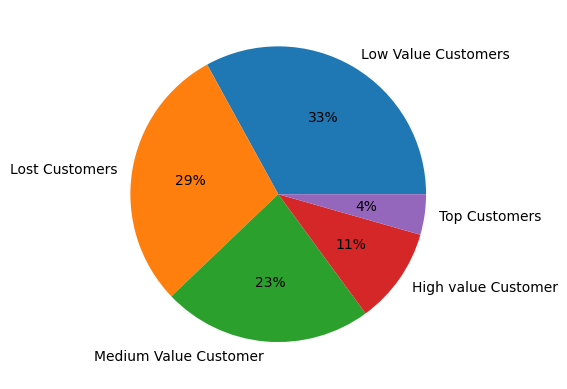

In [20]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()